In [107]:
# Import libraries
import os
from tqdm import tqdm
import numpy as np
import pandas as pd

# Redirecting to the directory
# os.chdir(os.path.join('.\ECON4999X'))
CLEANED_DATA_DIR = os.path.normpath(r'.\Cleaned_Data')
DA_DATA_DIR = os.path.normpath(r'.\da_working_files')
print(os.listdir(CLEANED_DATA_DIR))

['capitaliq_output.xlsx', 'df_exchange_info_master.xlsx', 'df_exchange_mapping.csv', 'df_ghg_ts_long_form.csv', 'df_ghg_ts_long_form_selected.csv', 'df_ghg_ts_master.csv', 'df_info_master.csv', 'df_power_ts_long_form.csv', 'df_power_ts_long_form_selected.csv', 'df_power_ts_master.csv', 'df_selected_comps.csv', 'hardcode_data.xlsx']


In [2]:
# Reading dataframe
df_ghg = pd.read_csv(os.path.join(CLEANED_DATA_DIR, 'df_ghg_ts_long_form.csv'))
df_ghg.head()

# We want to make a dataframe that only contains entity with long enough history
entity_history_requirement = 15
df_ghg_long_hist_comps = df_ghg.groupby('entity_id').filter(lambda x: len(x['year']) >= entity_history_requirement)

In [10]:
df_info_master = pd.read_csv(os.path.join(CLEANED_DATA_DIR, 'df_info_master.csv'))
df_exchange_map = pd.read_csv(os.path.join(CLEANED_DATA_DIR, 'df_exchange_mapping.csv'), encoding='latin-1')

# clear original index
df_info_master = df_info_master.drop(0)

In [61]:
df_temp_industry_map = df_info_master[['entity_id', 'industry_classification']]
df_temp_industry_map['entity_id'] = df_temp_industry_map['entity_id'].astype(int)
df_ghg_long_hist_comps = df_ghg_long_hist_comps.merge(df_temp_industry_map, on='entity_id', how='left')
df_ghg_long_hist_comps

C:\Users\Edrick\AppData\Local\Temp\ipykernel_14200\2892684357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_industry_map['entity_id'] = df_temp_industry_map['entity_id'].astype(int)


,entity_id,year,absolute_ghg_scope_1,absolute_ghg_scope_2,intensity_ghg_scope_1,intensity_ghg_scope_2,exchange,is_eu,region,industry_classification
0,1031123,2004,6.094485e+06,1582.414375,3167.529750,0.822439,NYSE,NaN,United States,Electric Power Distribution; Electric Power Tr...
1,1031123,2004,6.094485e+06,1582.414375,3167.529750,0.822439,NYSE,NaN,United States,Electric Power Distribution; Electric Power Ge...
2,1031123,2004,6.094485e+06,1582.414375,3167.529750,0.822439,NYSE,NaN,United States,Electric Power Transmission and Control; Elect...
3,1031123,2004,6.094485e+06,1582.414375,3167.529750,0.822439,NYSE,NaN,United States,Electric Power Generation By Fossil Fuels; Ele...
4,1031123,2004,6.094485e+06,1582.414375,3167.529750,0.822439,NYSE,NaN,United States,Electric Power Generation By Fossil Fuels; Ele...
...,...,...,...,...,...,...,...,...,...,...
12804,6334128,2017,4.917586e+04,440908.000000,20.983937,188.140815,CPSE,NaN,Cambodia,Chemicals
12805,6334128,2018,4.672165e+04,451956.000000,20.504823,198.350816,CPSE,NaN,Cambodia,Chemicals
12806,6334128,2019,4.867132e+04,414686.000000,22.582712,192.407654,CPSE,NaN,Cambodia,Chemicals
12807,6334128,2020,4.590129e+04,447481.160000,21.427000,208.884000,CPSE,NaN,Cambodia,Chemicals


#### Filtering companies with industry name "Electric"

In [62]:
# Create dataset with exchange information
df_ghg_long_hist_comps = df_ghg_long_hist_comps.merge(df_exchange_map[['exchange', 'region']], on='exchange')

In [77]:
# industry mask filter companies that include the keyword 'Electric Power'
industry_mask = df_ghg_long_hist_comps['industry_classification'].str.contains('Electric Power')
df_ghg_long_hist_comps = df_ghg_long_hist_comps[industry_mask]

In [78]:
# Select the obs that are from eu
df_ghg_long_hist_comps_eu = df_ghg_long_hist_comps.query("is_eu == True")
df_ghg_long_hist_comps_non_eu = df_ghg_long_hist_comps.query("is_eu != True")

In [79]:
# Checking if the length of the dataset is correct
print(len(df_ghg_long_hist_comps_non_eu) + len(df_ghg_long_hist_comps_eu) == len(df_ghg_long_hist_comps))
print(len(df_ghg_long_hist_comps_non_eu), len(df_ghg_long_hist_comps_eu), len(df_ghg_long_hist_comps))

True
3259 904 4163


In [80]:
df_ghg_long_hist_comps_eu.columns

Index(['entity_id', 'year', 'absolute_ghg_scope_1', 'absolute_ghg_scope_2',
       'intensity_ghg_scope_1', 'intensity_ghg_scope_2', 'exchange', 'is_eu',
       'region_x', 'industry_classification', 'region_y'],
      dtype='object')

<Axes: xlabel='year'>

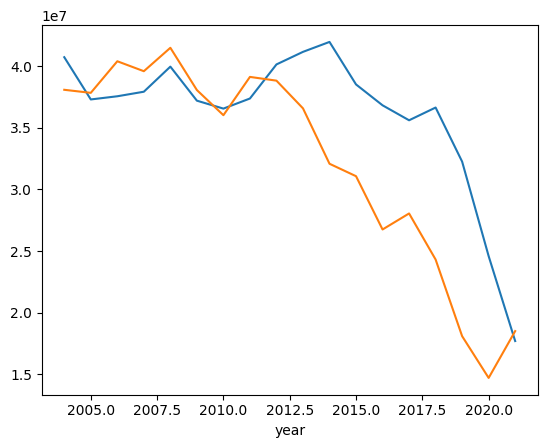

In [83]:
df_ghg_long_hist_comps_non_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()
df_ghg_long_hist_comps_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()

In [126]:
# Number of companies in EU
df_ghg_long_hist_comps_eu.groupby(['year']).count()
# Number of companies in non-EU
df_ghg_long_hist_comps_non_eu.groupby(['year']).count()

# Randomly pick 50 companies from two datasets
random_non_eu = df_ghg_long_hist_comps_non_eu['entity_id'].sample(50)
random_eu = df_ghg_long_hist_comps_eu['entity_id'].sample(50)

# Create a new dataset that only contains the randomly picked companies
df_ghg_long_hist_comps_eu_sample = df_ghg_long_hist_comps_eu[df_ghg_long_hist_comps_eu['entity_id'].isin(random_eu)]
df_ghg_long_hist_comps_non_eu_sample = df_ghg_long_hist_comps_non_eu[df_ghg_long_hist_comps_non_eu['entity_id'].isin(random_non_eu)]

In [96]:
df_ghg_long_hist_comps_non_eu_sample['region_x'].unique()

array(['United States', 'Canada', 'Japan', 'Australia', 'New Zealand',
       'Hong Kong', 'Brazil', 'Chile', 'Russia', 'Malaysia', 'India',
       'Switzerland', 'Philippines'], dtype=object)

<Axes: xlabel='year'>

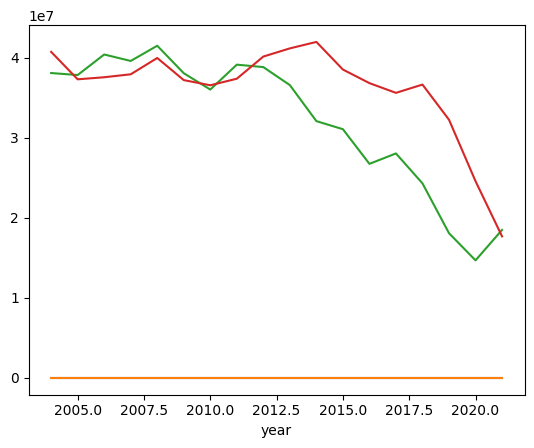

In [121]:
# df_ghg_long_hist_comps_eu['absolute_ghg_scope_1_log'] = np.log(df_ghg_long_hist_comps_eu['absolute_ghg_scope_1'])
# df_ghg_long_hist_comps_non_eu['absolute_ghg_scope_1_log'] = np.log(df_ghg_long_hist_comps_non_eu['absolute_ghg_scope_1'])

df_ghg_long_hist_comps_eu.groupby('year')['absolute_ghg_scope_1_log'].mean().plot()
df_ghg_long_hist_comps_non_eu.groupby('year')['absolute_ghg_scope_1_log'].mean().plot()

df_ghg_long_hist_comps_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()
df_ghg_long_hist_comps_non_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()

<Axes: xlabel='year'>

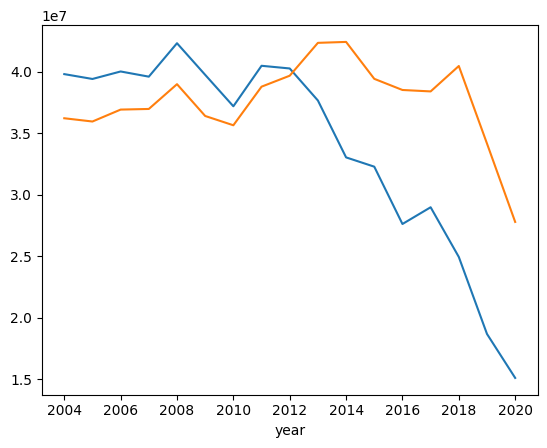

In [128]:
df_filter_year_eu = df_ghg_long_hist_comps_eu_sample.query("year <= 2020")
df_filter_year_non_eu = df_ghg_long_hist_comps_non_eu_sample.query("year <= 2020")

df_filter_year_eu.loc[:, 'absolute_ghg_scope_1_log'] = np.log(df_filter_year_eu['absolute_ghg_scope_1'])
df_filter_year_non_eu.loc[:, 'absolute_ghg_scope_1_log'] = np.log(df_filter_year_non_eu['absolute_ghg_scope_1'])

df_filter_year_eu.groupby('year')['absolute_ghg_scope_1_log'].mean().plot()
df_filter_year_non_eu.groupby('year')['absolute_ghg_scope_1_log'].mean().plot()

df_filter_year_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()
df_filter_year_non_eu.groupby('year')['absolute_ghg_scope_1'].mean().plot()

C:\Users\Edrick\AppData\Local\Temp\ipykernel_14200\407508428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ghg_long_hist_comps_non_eu_sample['absolute_ghg_scope_1'] = np.log(df_ghg_long_hist_comps_non_eu_sample['absolute_ghg_scope_1'])


<Axes: xlabel='year'>

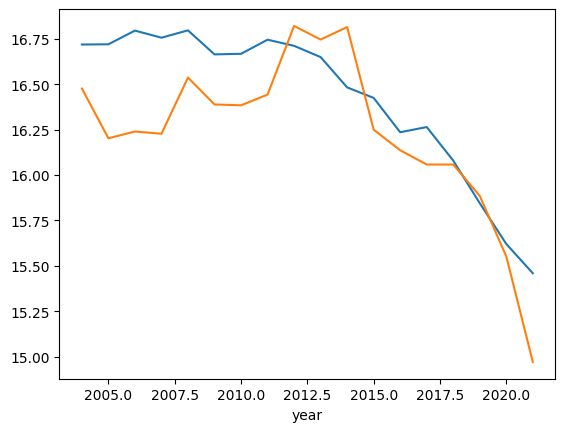

In [116]:
df_ghg_long_hist_comps_eu_sample['absolute_ghg_scope_1'] = np.log(df_ghg_long_hist_comps_eu_sample['absolute_ghg_scope_1'])
df_ghg_long_hist_comps_non_eu_sample['absolute_ghg_scope_1'] = np.log(df_ghg_long_hist_comps_non_eu_sample['absolute_ghg_scope_1'])

df_ghg_long_hist_comps_eu_sample.groupby('year')['absolute_ghg_scope_1'].mean().plot()
df_ghg_long_hist_comps_non_eu_sample.groupby('year')['absolute_ghg_scope_1'].mean().plot()

### Manual diff-in-diff analysis

In [113]:
# Creating year variable
diff_year = 2012
df_ghg_long_hist_comps_eu.loc[:, f'after_{diff_year}'] = df_ghg_long_hist_comps_eu['year'] >= diff_year
df_ghg_long_hist_comps_non_eu.loc[:, f'after_{diff_year}'] = df_ghg_long_hist_comps_non_eu['year'] >= diff_year

C:\Users\Edrick\AppData\Local\Temp\ipykernel_14200\1745535849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ghg_long_hist_comps_eu.loc[:, f'after_{diff_year}'] = df_ghg_long_hist_comps_eu['year'] >= diff_year
C:\Users\Edrick\AppData\Local\Temp\ipykernel_14200\1745535849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ghg_long_hist_comps_non_eu.loc[:, f'after_{diff_year}'] = df_ghg_long_hist_comps_non_eu['year'] >= diff_year


In [114]:
diff_year_var = f'after_{diff_year}'
control_pre_mean = df_ghg_long_hist_comps_non_eu.query(f"{diff_year_var} == False")['absolute_ghg_scope_1_log'].mean()
control_post_mean = df_ghg_long_hist_comps_non_eu.query(f"{diff_year_var} == True")['absolute_ghg_scope_1_log'].mean()

treatment_pre_mean = df_ghg_long_hist_comps_eu.query(f"{diff_year_var} == False")['absolute_ghg_scope_1_log'].mean()
treatment_post_mean = df_ghg_long_hist_comps_eu.query(f"{diff_year_var} == True")['absolute_ghg_scope_1_log'].mean()


In [115]:
treatment_diff = treatment_post_mean - treatment_pre_mean
control_diff = control_post_mean - control_pre_mean

pre_diff = treatment_pre_mean - control_pre_mean
post_diff = treatment_post_mean - control_post_mean

print('\t', '|' , f'Before {diff_year}', '|', f'After {diff_year}', '|', 'diff')
print('Treatment', '|', treatment_pre_mean, '|', treatment_post_mean, '|', treatment_diff)
print('Control', '|', control_pre_mean, '|', control_post_mean, '|', control_diff)
print('\t', '|', pre_diff, '|', post_diff, '|', treatment_diff - control_diff)
print('', treatment_diff - control_diff)
print('', post_diff - pre_diff)

	 | Before 2012 | After 2012 | diff
Treatment | 16.732210837273527 | 16.218010848084045 | -0.514199989189482
Control | 16.39449101987544 | 16.16311692018399 | -0.23137409969144684
	 | 0.33771981739808865 | 0.05489392790005354 | -0.2828258894980351
 -0.2828258894980351
 -0.2828258894980351
